<a href="https://colab.research.google.com/github/rajagopalmotivate/DeepLearning_Quantam/blob/main/H2O_PES_DM21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple comparision of DFT vs NN 
## Hypothesis: NN performs as good as DFT 
## Experiment: Compare 

load from mydrive after logging into rajagopal.motivate3@gmail.com


## Step 1: Install

In [ ]:
#!pip install git+git://github.com/deepmind/deepmind-research.git#subdirectory=density_functional_approximation_dm21

In [1]:
!git clone https://github.com/deepmind/deepmind-research.git


Cloning into 'deepmind-research'...
remote: Enumerating objects: 2707, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 2707 (delta 12), reused 37 (delta 9), pack-reused 2663
Receiving objects: 100% (2707/2707), 91.85 MiB | 13.69 MiB/s, done.
Resolving deltas: 100% (1404/1404), done.
Updating files: 100% (761/761), done.


In [2]:
cd deepmind-research/density_functional_approximation_dm21


/content/deepmind-research/density_functional_approximation_dm21


In [3]:
pwd

'/content/deepmind-research/density_functional_approximation_dm21'

In [1]:
!pip install .


ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [2]:
!pip install pyscf==2.0.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 11.1 MB/s eta 0:00:00


In [3]:
EXPNO ='PES_H2O_Exp2000'

dictPeriodicTable = {'H': 1}
 
elementname ='H' 

dictPeriodicTable = {'F': 9}
 
elementname ='F' 

In [4]:
isDebug = True 


In [5]:

functionalsList = ['b3lyp','M06-2X' , 'SCAN'    ,'wB97X-V',  'PW6B95' ,  'pbe' ,  'pbe0']

functionalsList = [ 'b3lyp', 'SCAN'  , 'wB97X-V'  , 'pbe', 'M06-2X' ,'PW6B95'  ]

functionalsList = [ 'b3lyp',  'wB97X-V' , 'SCAN'  ,   'pbe'  ]

functionalsList = ['b3lyp']

In [6]:
ComputeThisInThisRUN = 'NN' #@param ["DFT", "CCST", "NN"]


In [7]:
CHOOSENaaFunctional = 'b3lyp' #@param ["b3lyp", "wB97X-V" ]

functionalsList =[CHOOSENaaFunctional]

In [8]:
CHOOSENaNNFunctional = 'Functional.DM21m' #@param ["Functional.DM21m" ]



In [9]:
firstTimeorRestart = False

In [10]:
lookforAlreadyCompletedHINT = 'RESTART_HINT_WORD'
if ComputeThisInThisRUN == 'DFT':
  lookforAlreadyCompletedHINT = 'DFT-' +  CHOOSENaaFunctional

if ComputeThisInThisRUN == 'CCST':
  lookforAlreadyCompletedHINT = 'CCST'  

if ComputeThisInThisRUN == 'NN':
  lookforAlreadyCompletedHINT = 'NN-' +   CHOOSENaNNFunctional

print("LOOKING FOR " + lookforAlreadyCompletedHINT)


LOOKING FOR NN-Functional.DM21m


In [11]:
moleculegeomtryTemplateinZmatrix = '''
          O
          H  1  BONDLENGHTOH
          H  1  BONDLENGHTOH  2 ANGLEOHO
          '''

In [12]:

import numpy as np
import pandas as pd

In [13]:
Global_Range_BONDANGLE_OHO = range(85, 124, 1)
Global_Range_BONDANGLE_OHO = range(85, 124, 2)


In [14]:
Global_Range_BONDLENGTH_HO = np.arange(0.8, 1.3, 0.02, dtype=float)
Global_Range_BONDLENGTH_HO = np.arange(0.8, 1.3, 0.02, dtype=float)


In [15]:
len(Global_Range_BONDLENGTH_HO)

25

In [16]:
len([*Global_Range_BONDANGLE_OHO] )

20

In [17]:
moleculegeomtryTemplateinZmatrix

'\n          O\n          H  1  BONDLENGHTOH\n          H  1  BONDLENGHTOH  2 ANGLEOHO\n          '

In [20]:
listBasisSet = ['def2-QZVP' , 'cc-pCVTZ' ,  'aug-pc-3' , 'aug-cc-pV(Q+d)Z', 'aug-cc-pCV5Z', 'aug-ccpwCV5Z', '6-21g']

listBasisSet = ['cc-pCVDZ' , 'def2-QZVP' , 'cc-pCVTZ' ,  'aug-pc-3' , 'aug-cc-pV(Q+d)Z', 'aug-cc-pCV5Z', 'aug-ccpwCV5Z', '6-31g', 'STO-3G' , 'def2-QZVPPD' ]

listBasisSet = [   'cc-pVDZ' ]


listBasisSet = ['cc-pVDZ']

In [21]:
BASISSETTOUSE =   'cc-pVDZ'

In [22]:
dictPeriodicTableSpinValues = {'H': 1,  'He': 0, 'Li': 1, 'Be': 0, 'B': 1, 'C': 0, 'N': 1, 'O': 0, 'F': 1, 'Cl': 0 }

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd

 

In [25]:
if firstTimeorRestart == False:
  #df = pd.read_csv('/content/drive/My Drive/DeepMind' + EXPNO+ 'CE-Final-.csv' )
  dfRestart = pd.read_csv('/content/drive/My Drive/tryDeepMind' + EXPNO+ 'CE-temp2D-.csv' )


  

In [26]:
dfRestart2 = dfRestart.drop_duplicates(keep='first')

In [27]:
dfRestart = dfRestart2

In [28]:
 dfRestart

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Weight,Element,Molecule,BasisSet,Spin,BuiltMolecule,bond_lenght,bond_Angle,DFT-b3lyp,NN-Functional.DM21m
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,102.0,-76.303110,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,103.0,-76.303556,NaN
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,104.0,-76.303945,NaN
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,105.0,-76.304278,NaN
4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,106.0,-76.304558,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n O\n H 1 1.2800000000000...,6-31g,0,cc-pVDZ,1.28,113.0,NaN,-76.280483
5161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n O\n H 1 1.2800000000000...,6-31g,0,cc-pVDZ,1.28,117.0,NaN,-76.277193
5162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n O\n H 1 1.2800000000000...,6-31g,0,cc-pVDZ,1.28,119.0,NaN,-76.275350
5163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\n O\n H 1 1.2800000000000...,6-31g,0,cc-pVDZ,1.28,121.0,NaN,-76.273364


In [29]:
from pyscf import gto
from pyscf import dft

from pyscf import __config__
MAX_MEMORY = getattr(__config__, 'MAX_MEMORY')
MAX_MEMORY

4000

In [30]:
import psutil
systemresources = psutil.virtual_memory()

MAX_MEMORY = round( systemresources.available  * 0.000009)
PYSCF_MAX_MEMORY  = MAX_MEMORY

print('Configured to use max RAM resources of  ' + str(MAX_MEMORY))

Configured to use max RAM resources of  108712


In [31]:
setattr(__config__, 'MAX_MEMORY', PYSCF_MAX_MEMORY)

setattr(__config__, 'PYSCF_MAX_MEMORY', PYSCF_MAX_MEMORY)



In [32]:
MAX_MEMORY = getattr(__config__, 'MAX_MEMORY')
MAX_MEMORY

108712

In [33]:
def trydownloadingBasisSet(ElementsinMolecule, BasisSet, versionno):  
    target_url = 'https://www.basissetexchange.org/api/basis/' + str(BasisSet) +  '/format/nwchem/?version='+ str( versionno)+'&elements=' + str(ElementsinMolecule) 
    #print(target_url)
    try:
      textfile = urllib.request.urlopen(target_url)    
      mydownloadedfile = ""
      for line in textfile:
          #print(line.decode('utf-8')) #utf-8 or iso8859-1 or whatever the page encoding scheme is
          mydownloadedfile += line.decode('utf-8') 
      return True    
    except:
      return False

In [34]:
import urllib   # the lib that handles the url stuff
import urllib.request  # the lib that handles the url stuff


def getValidBasisSet(MoleculeList):
  ValidatedBasisSet = []
  ValBSSetVersionNumberDict = {}
  errorproneBasisSet = []
  for BasisSet in listBasisSet:
    didnotworkatallforanyversion = True
    for versionno in range(0,4):
      isworking = trydownloadingBasisSet(MoleculeList, BasisSet, versionno)
      if isworking == True:
        didnotworkatallforanyversion = False
        ValBSSetVersionNumberDict[BasisSet] = versionno
        ValidatedBasisSet.append(BasisSet)
        break
    if didnotworkatallforanyversion == True:
      errorproneBasisSet.append(BasisSet)
  return ValidatedBasisSet 

In [35]:
def downloadBasisSetAutoVersion(ElementsinMolecule, BasisSet):  
    for versionumber in range (0,4):
      target_url = 'https://www.basissetexchange.org/api/basis/' + str(BasisSet) +  '/format/nwchem/?version='+ str( versionumber)+'&elements=' + str(ElementsinMolecule) 
      try:
        textfile = urllib.request.urlopen(target_url)    
        mydownloadedfile = ""
        for line in textfile:
            #print(line.decode('utf-8')) #utf-8 or iso8859-1 or whatever the page encoding scheme is
            mydownloadedfile += line.decode('utf-8') 
        return mydownloadedfile    
      except:
        return None

In [36]:

PerdiocTableNumber = dictPeriodicTable [elementname]
ValidatedBasisSet = getValidBasisSet(PerdiocTableNumber)
len(ValidatedBasisSet)
ValidatedBasisSet

['cc-pVDZ']

In [37]:
basisSethandpicked =[  ]

In [ ]:
#listBasisSet = basisSet652

In [ ]:
#downloadBasisSetAutoVersion(1,'3-21G')

In [38]:
 hashLookUpMolecules = dict()
 

In [39]:
from pyscf import gto
from pyscf import dft

In [ ]:
import density_functional_approximation_dm21 as dm21


In [40]:
GlobalBONDLENGTH = .98

In [41]:
Global_Range_BONDLENGTH_HO_Array = []

In [42]:
for lengthHO in Global_Range_BONDLENGTH_HO:
  temp =   Global_Range_BONDLENGTH_HO_Array 


In [43]:
Global_Range_BONDLENGTH_HO

array([0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ,
       1.02, 1.04, 1.06, 1.08, 1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22,
       1.24, 1.26, 1.28])

In [44]:
# 
GlobalBONDANGLE_OHO = 0


In [45]:
def getMoleculeGeomtry():
  #print(moleculegeomtryTemplateinZmatrix)
  moleculegeomtry = moleculegeomtryTemplateinZmatrix.replace('ANGLEOHO', str(GlobalBONDANGLE_OHO))
  moleculegeomtry = moleculegeomtry.replace('BONDLENGHTOH', str(GlobalBONDLENGTH) )
  #print(moleculegeomtry)
  return moleculegeomtry


In [46]:
def buildaMoleculeSpinfor2DPES(elementname, elementname2, mydownloadedfile, mydownloadedfile2, trythisspin ):
      global GlobalBONDLENGTH
      mol = gto.Mole()     
#      mol.atom = [[elementname, ( 0, 0, GlobalBONDLENGTH)], [elementname2, (0, 0, -1* GlobalBONDLENGTH)] ]
      mol.atom = getMoleculeGeomtry() 

      mol.spin =  trythisspin
      mol.symmetry = True
     # mol.basis = { elementname: gto.parse(mydownloadedfile)  ,     elementname2: gto.parse(mydownloadedfile2)        }
      mol.basis = BASISSETTOUSE
      #mol.max_memory = PYSCF_MAX_MEMORY
      mol.build()
     # print( mol.atom_coords() )
      return mol

In [47]:
def buildaMoleculeTryMOLECULEELEMENTCOUNT2(elementname, elementname2, mydownloadedfile , mydownloadedfile2 ):
  molecule = None 
  for spinvaluecheckthis in range(5):
    try:
      molecule = buildaMoleculeSpinfor2DPES(elementname,elementname2, mydownloadedfile, mydownloadedfile2, spinvaluecheckthis )      
      return molecule, spinvaluecheckthis
      break
    except:
      tempexcept = True
      #print('SPIN is not correct. Auto matically trying another spin value...')
    else:
      tempelse = True
      #print('TRYING SPIN')
  return molecule, spinvaluecheckthis
 


In [48]:
getMoleculeGeomtry()

'\n          O\n          H  1  0.98\n          H  1  0.98  2 0\n          '

In [49]:
def buildaMoleculeSpinMOLECULEELEMENTCOUNT1(elementname, mydownloadedfile,  trythisspin ):
      mol = gto.Mole()
      #mol.atom = '''H 0 0 0'''
      mol.atom = [[elementname, (0, 0, 0)] ]
      mol.spin =  trythisspin
      mol.basis = { elementname: gto.parse(mydownloadedfile)       }
      mol.build()
      return mol

In [50]:
def buildaMoleculeTryMOLECULEELEMENTCOUNT1(elementname,  mydownloadedfile ):
  molecule = None 
  for spinvaluecheckthis in range(5):
    try:
      molecule = buildaMoleculeSpinMOLECULEELEMENTCOUNT1(elementname, mydownloadedfile, spinvaluecheckthis )      
      return molecule, spinvaluecheckthis
      break
    except:
      tempexcept = True
      #print('SPIN is not correct. Auto matically trying another spin value...')
    else:
      tempelse = True
      #print('TRYING SPIN')
  return molecule, spinvaluecheckthis
 


In [51]:
print(Global_Range_BONDLENGTH_HO)

type(Global_Range_BONDLENGTH_HO)

Global_Range_BONDLENGTH_HO[1]

[0.8  0.82 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06
 1.08 1.1  1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28]


0.8200000000000001

In [52]:
!pip install py3Dmol


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
import py3Dmol


In [54]:
Global_Range_BONDLENGTH_HO

array([0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ,
       1.02, 1.04, 1.06, 1.08, 1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22,
       1.24, 1.26, 1.28])

In [55]:
Global_Range_BONDANGLE_OHO

range(85, 124, 2)

In [57]:
import pandas as pd
#df = pd.read_csv('/content/drive/My Drive/DeepMind' + EXPNO+ 'CE-Final-.csv' )


In [75]:
df = dfRestart.copy()
 

In [91]:
df.drop(columns=['Weight', 'Element',   'BasisSet', 'BuiltMolecule'])

,Molecule,Spin,bond_lenght,bond_Angle,DFT-b3lyp,NN-Functional.DM21m
0,\n O\n H 1 0.8\n ...,0,0.80,102.0,-76.303110,NaN
1,\n O\n H 1 0.8\n ...,0,0.80,103.0,-76.303556,NaN
2,\n O\n H 1 0.8\n ...,0,0.80,104.0,-76.303945,NaN
3,\n O\n H 1 0.8\n ...,0,0.80,105.0,-76.304278,NaN
4,\n O\n H 1 0.8\n ...,0,0.80,106.0,-76.304558,NaN
...,...,...,...,...,...,...
5160,\n O\n H 1 1.2800000000000...,0,1.28,113.0,NaN,-76.280483
5161,\n O\n H 1 1.2800000000000...,0,1.28,117.0,NaN,-76.277193
5162,\n O\n H 1 1.2800000000000...,0,1.28,119.0,NaN,-76.275350
5163,\n O\n H 1 1.2800000000000...,0,1.28,121.0,NaN,-76.273364


In [88]:
df.drop(columns=['Unnamed: 0.1.1.1.1.1.1.1'] , inplace=True)
 

In [92]:
df

,Weight,Element,Molecule,BasisSet,Spin,BuiltMolecule,bond_lenght,bond_Angle,DFT-b3lyp,NN-Functional.DM21m
0,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,102.0,-76.303110,NaN
1,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,103.0,-76.303556,NaN
2,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,104.0,-76.303945,NaN
3,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,105.0,-76.304278,NaN
4,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,106.0,-76.304558,NaN
...,...,...,...,...,...,...,...,...,...,...
5160,NaN,NaN,\n O\n H 1 1.2800000000000...,6-31g,0,cc-pVDZ,1.28,113.0,NaN,-76.280483
5161,NaN,NaN,\n O\n H 1 1.2800000000000...,6-31g,0,cc-pVDZ,1.28,117.0,NaN,-76.277193
5162,NaN,NaN,\n O\n H 1 1.2800000000000...,6-31g,0,cc-pVDZ,1.28,119.0,NaN,-76.275350
5163,NaN,NaN,\n O\n H 1 1.2800000000000...,6-31g,0,cc-pVDZ,1.28,121.0,NaN,-76.273364


In [93]:
df

,Weight,Element,Molecule,BasisSet,Spin,BuiltMolecule,bond_lenght,bond_Angle,DFT-b3lyp,NN-Functional.DM21m
0,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,102.0,-76.303110,NaN
1,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,103.0,-76.303556,NaN
2,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,104.0,-76.303945,NaN
3,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,105.0,-76.304278,NaN
4,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,106.0,-76.304558,NaN
...,...,...,...,...,...,...,...,...,...,...
5160,NaN,NaN,\n O\n H 1 1.2800000000000...,6-31g,0,cc-pVDZ,1.28,113.0,NaN,-76.280483
5161,NaN,NaN,\n O\n H 1 1.2800000000000...,6-31g,0,cc-pVDZ,1.28,117.0,NaN,-76.277193
5162,NaN,NaN,\n O\n H 1 1.2800000000000...,6-31g,0,cc-pVDZ,1.28,119.0,NaN,-76.275350
5163,NaN,NaN,\n O\n H 1 1.2800000000000...,6-31g,0,cc-pVDZ,1.28,121.0,NaN,-76.273364


In [94]:
import  matplotlib.font_manager

flist = matplotlib.font_manager.get_fontconfig_fonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
print(names)

['Liberation Sans', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Sans', 'Liberation Mono', 'Liberation Serif', 'Liberation Sans', 'Liberation Serif', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Sans Narrow', 'Humor Sans', 'Liberation Mono', 'Liberation Serif', 'Liberation Mono']


In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

 

In [96]:
dfBACKUP = df.copy(deep=True)


In [97]:
dfDFT = dfBACKUP.copy(deep=True)

dfDFTnew = dfDFT[ dfDFT['DFT-b3lyp'].notnull()]

dfDFTnew = dfDFT[ dfDFT['NN-Functional.DM21m'].notnull()]
 

In [98]:
df = dfDFTnew 

In [99]:
df

,Weight,Element,Molecule,BasisSet,Spin,BuiltMolecule,bond_lenght,bond_Angle,DFT-b3lyp,NN-Functional.DM21m
4563,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,85.0,NaN,-76.284631
4564,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,86.0,NaN,-76.286251
4565,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,87.0,NaN,-76.287790
4566,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,88.0,NaN,-76.289248
4567,NaN,NaN,\n O\n H 1 0.8\n ...,6-31g,0,cc-pVDZ,0.80,89.0,NaN,-76.290630
...,...,...,...,...,...,...,...,...,...,...
5160,NaN,NaN,\n O\n H 1 1.2800000000000...,6-31g,0,cc-pVDZ,1.28,113.0,NaN,-76.280483
5161,NaN,NaN,\n O\n H 1 1.2800000000000...,6-31g,0,cc-pVDZ,1.28,117.0,NaN,-76.277193
5162,NaN,NaN,\n O\n H 1 1.2800000000000...,6-31g,0,cc-pVDZ,1.28,119.0,NaN,-76.275350
5163,NaN,NaN,\n O\n H 1 1.2800000000000...,6-31g,0,cc-pVDZ,1.28,121.0,NaN,-76.273364


In [101]:
dftesting = df.copy(deep=True)
dftesting = dftesting[ (dftesting['bond_lenght'] <= 1.09) &  (dftesting['bond_lenght'] >= 0.90) ] 

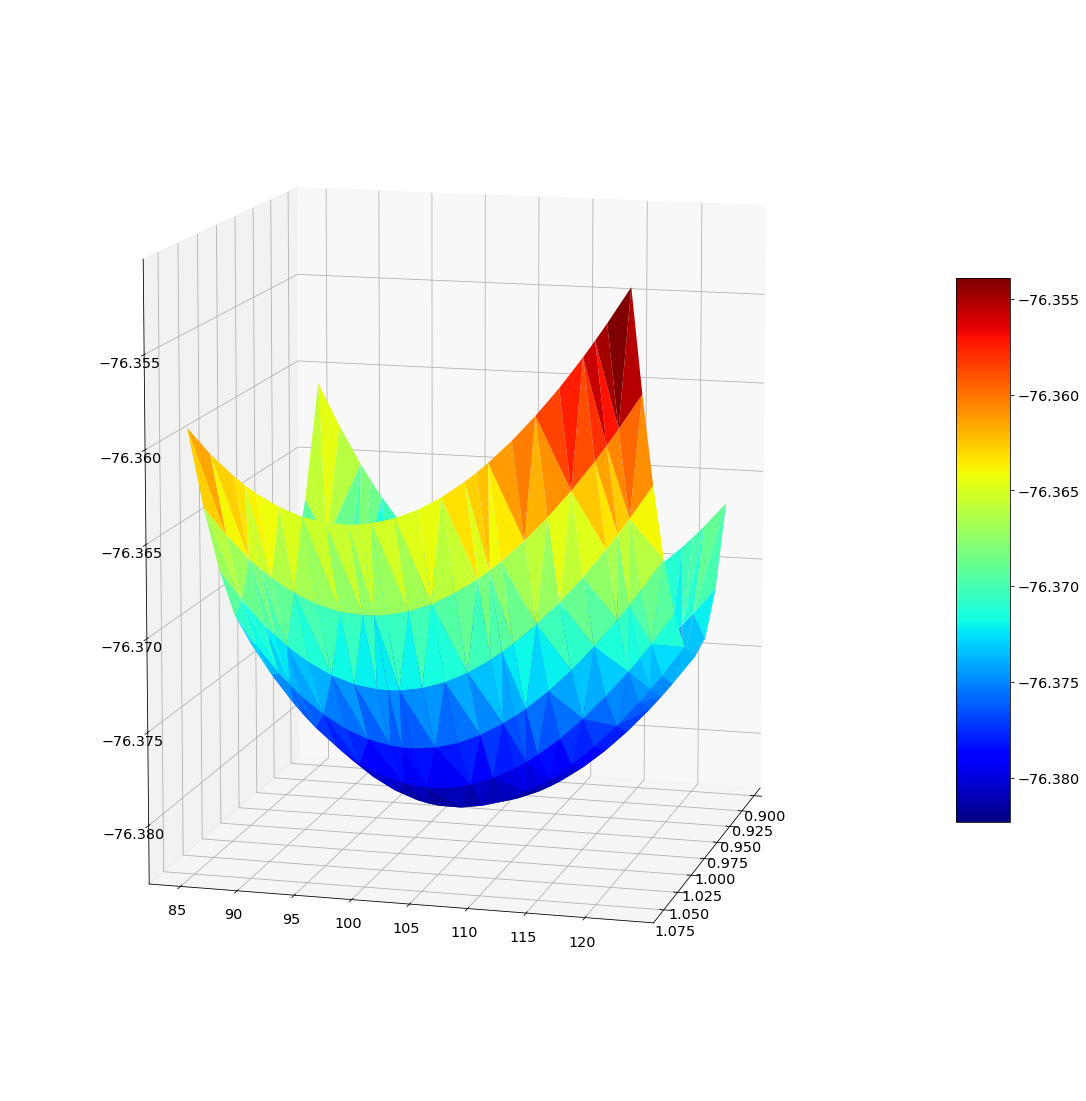

In [102]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(dftesting['bond_lenght'], dftesting['bond_Angle'], dftesting['NN-Functional.DM21m'], cmap=plt.cm.jet,  linewidth=0.01)
ax.view_init(10, 15 )

fig.colorbar( surf, shrink=0.5, aspect=10)
plt.show()

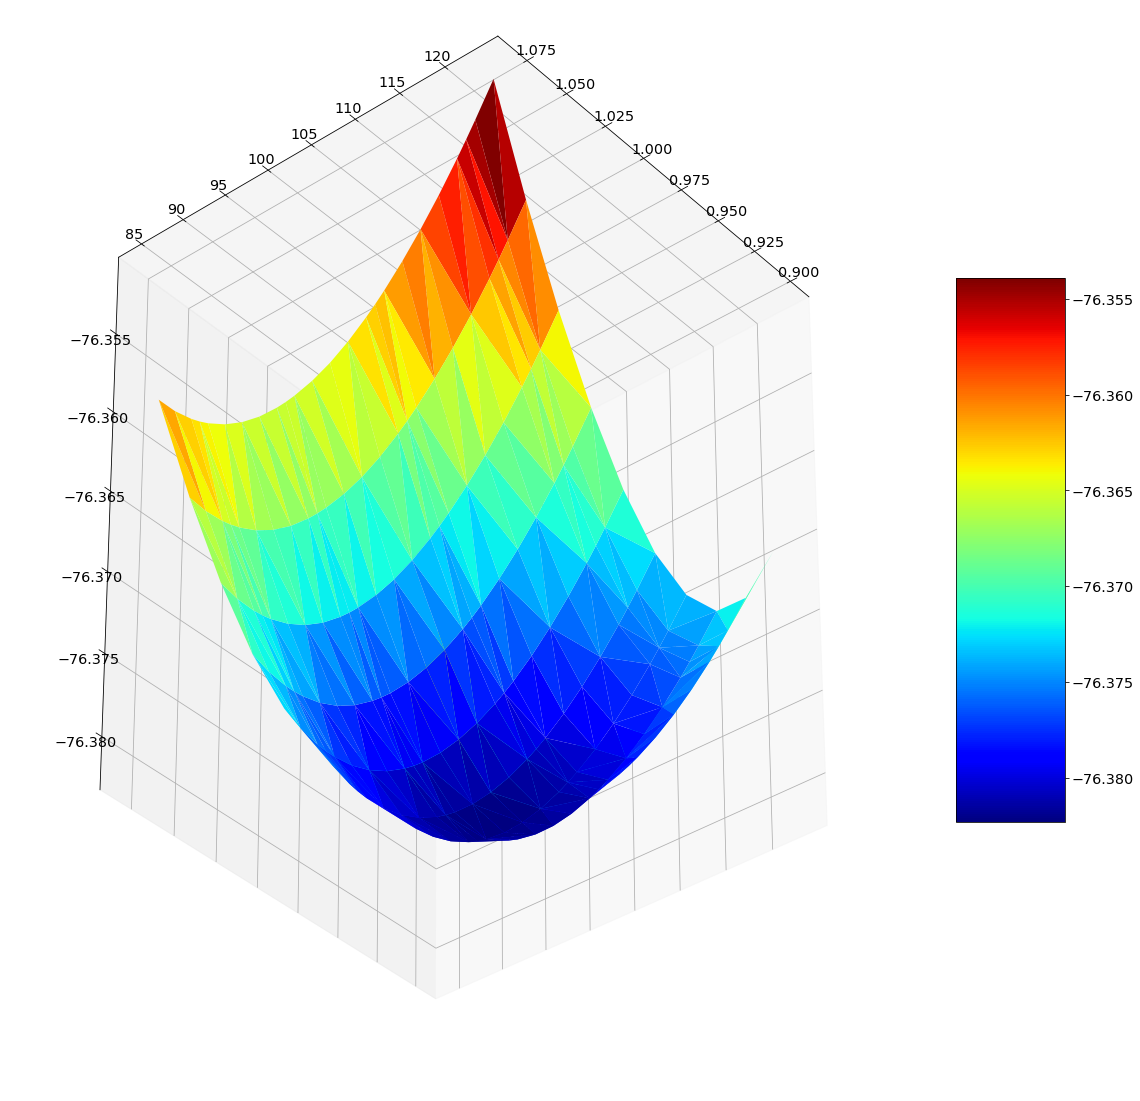

In [104]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
ax = fig.gca(projection='3d')
surf=ax.plot_trisurf(dftesting['bond_lenght'], dftesting['bond_Angle'], dftesting['NN-Functional.DM21m'], cmap=plt.cm.jet,  linewidth=0.02)
ax.view_init(-30, 40 )

fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()

In [ ]:
import plotly.graph_objects as go

import seaborn as sb
import matplotlib.pyplot as plot
import numpy as np
x = dftesting['bond_lenght'].to_numpy()
y = dftesting['bond_Angle'].to_numpy()
z = dftesting['NN-Functional.DM21m'].to_numpy()

fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='lightpink', alphahull=-1, opacity=0.50)])
fig.show()

In [107]:
surf=dict(type='surface',
           x=x, 
           y=y,
           z=z             
)
fig = go.Figure(surf)

In [ ]:
import plotly.express as px

 

In [146]:
marker=dict(
        size=3,
        color=z,                # set color to an array/list of desired values
        colorscale='Turbo',   # choose a colorscale Viridis Rainbow   Aggrnyl Turbo Plotly3 RdBu
        opacity=1
    )



fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker= marker)])

fig.update_layout(height=1000,  title='PES of water infered using DeepMind21' ,                   scene=dict(
        xaxis_title='Bond angle',
        yaxis_title='Bond length',
        zaxis_title='Energy',
    ) )

fig.show()

In [110]:
w  = len(Global_Range_BONDANGLE_OHO)
w

20

In [111]:
mylistofbongangles = list([*Global_Range_BONDANGLE_OHO])

mylistofbonganglesarray = np.array(mylistofbongangles)



In [112]:
[*Global_Range_BONDANGLE_OHO]

[85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123]

In [115]:
Global_Range_BONDLENGTH_HO

array([0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ,
       1.02, 1.04, 1.06, 1.08, 1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22,
       1.24, 1.26, 1.28])

In [116]:
h = len(Global_Range_BONDLENGTH_HO)
h

25

In [119]:
import numpy

In [120]:
Matrix = [[0.0 for x in range(w)] for y in range(h)] 
myarray = numpy.array(Matrix)

In [121]:
myarray.shape

(25, 20)

In [122]:
# Read data from a csv
df2 = df.copy(deep=True)
df5 =  df2[ [  'NN-Functional.DM21m',  'bond_Angle', 'bond_lenght'  ] ]

In [123]:
df5 = df5.round({'bond_Angle': 3, 'bond_lenght': 3})

In [124]:
df5

,NN-Functional.DM21m,bond_Angle,bond_lenght
4563,-76.284631,85.0,0.80
4564,-76.286251,86.0,0.80
4565,-76.287790,87.0,0.80
4566,-76.289248,88.0,0.80
4567,-76.290630,89.0,0.80
...,...,...,...
5160,-76.280483,113.0,1.28
5161,-76.277193,117.0,1.28
5162,-76.275350,119.0,1.28
5163,-76.273364,121.0,1.28


In [ ]:
for i in range(0, 1):
  if True:
    for elementname in dictPeriodicTable.keys():
      bondlenghtcounter = -1 
      for lengthHO in Global_Range_BONDLENGTH_HO:
        bondlenghtcounter= bondlenghtcounter + 1 
        anglecounter = -1 
        for angle1 in Global_Range_BONDANGLE_OHO:
          anglecounter= anglecounter + 1 
          GlobalBONDANGLE_OHO = angle1
          GlobalBONDLENGTH =  lengthHO
#          print('************************************##############################################*###############################  BONDLENGHT_HO = ' + str(lengthHO))          
#          print('************************************##############################################*###############################  BONDLENGHT_HO = ' + str(round(lengthHO, 3)))          
      #    print('************************************##############################################*###############################  BONDANGLE_OHO = ' + str(GlobalBONDANGLE_OHO))
          temppppp = df5.loc[  (   df5['bond_Angle'] == round(angle1, 3)) & (df5['bond_lenght'] == round( lengthHO, 3))     ]  
#          temppppp = df5.loc[  (df5['bond_Angle'] == round(lengthHO, 3) )     ]       
          if (len( temppppp['NN-Functional.DM21m']) > 0):     
            print(  temppppp['NN-Functional.DM21m'].values[0]  ) 
            myarray[   bondlenghtcounter, anglecounter ] = temppppp['NN-Functional.DM21m'].values[0] 

 

In [139]:
import plotly.graph_objects as go

contours=dict(
            coloring ='heatmap',
             showlabels = True, # show labels on contours
            labelfont = dict( # label font properties
                size = 12,
                color = 'white',
            )
        )

fig = go.Figure(data =
    go.Contour(
        z=myarray,   y=Global_Range_BONDLENGTH_HO, x=mylistofbonganglesarray ,  connectgaps=True, showscale=True, line_smoothing=0.65, colorscale='Rainbow', contours=contours
    ))

fig.update_layout(height=1000)

fig.show()

In [129]:
# Read data from a csv
 
contours=dict(
            start=0,
            end=8,
            size=2,
        )



fig = go.Figure(data=[go.Surface(z=myarray , y=Global_Range_BONDLENGTH_HO, x=mylistofbonganglesarray  , colorscale='Rainbow' ) ]  )
fig.update_traces(contours_z=dict(show=True, usecolormap=True,      highlight=True,
                                  highlightcolor="limegreen", project_z=True))
fig.update_layout( autosize=True,
                  scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                  width=1000, height=1000,
                  title='2D PES',     
                  scene=dict(
        xaxis_title='Bond angle',
        yaxis_title='Bond length',
        zaxis_title='Energy',
    ),                               
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()